In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import fix_yahoo_finance as yf

In [3]:
Df = yf.download('AMZN', '2008-01-01', '2018-07-08')

[*********************100%***********************]  1 of 1 downloaded


In [4]:
Df=Df[['Close']]

In [5]:
Df

,Close
Date,
2008-01-02,96.250000
2008-01-03,95.209999
2008-01-04,88.790001
2008-01-07,88.820000
2008-01-08,87.879997
2008-01-09,85.220001
2008-01-10,84.260002
2008-01-11,81.080002
2008-01-14,82.870003


In [6]:
Df= Df.dropna()

In [7]:
Df.Close.plot(figsize=(15,10))

In [8]:
plt.title('AMZN')
plt.ylabel('Price')

Text(0,0.5,'Price')

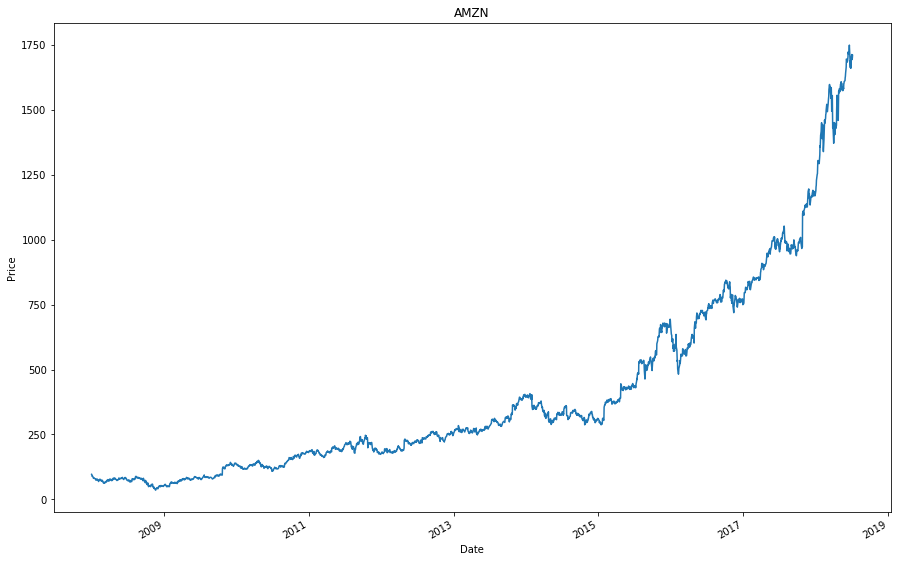

In [9]:
plt.show()

In [10]:
Df['SMA_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['SMA_9'] = Df['Close'].shift(1).rolling(window=9).mean()
Df= Df.dropna()
X = Df[['SMA_3','SMA_9']]
X.head()

,SMA_3,SMA_9
Date,,
2008-01-15,82.736669,87.820001
2008-01-16,81.396668,86.041111
2008-01-17,81.153333,84.390000
2008-01-18,80.236666,83.426667
2008-01-22,80.076668,82.420001


In [11]:
y = Df['Close']
y.head()

Date
2008-01-15    80.239998
2008-01-16    80.349998
2008-01-17    80.120003
2008-01-18    79.760002
2008-01-22    78.480003
Name: Close, dtype: float64

In [12]:
t=.8
t= int(t*len(Df))
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [13]:
## Create Linear regression Model
linear = LinearRegression().fit(X_train,y_train)
print ("Price =", round(linear.coef_[0],2), \
"* 3SMA", round(linear.coef_[1],2), \
"* 9SMA +", round(linear.intercept_,2))

Price = 1.17 * 3SMA -0.17 * 9SMA + 0.03


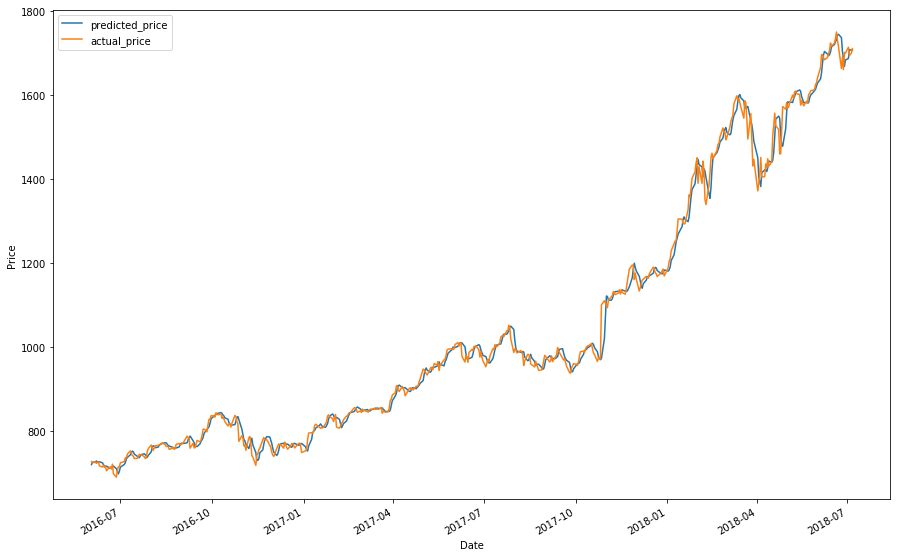

In [14]:
p_price = linear.predict(X_test)
p_price = pd.DataFrame(p_price,index=y_test.index,columns = ['price'])
p_price.plot(figsize=(15,10))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Price")
plt.show()
                                                             

In [15]:
r2 = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2))

99.54